In [24]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score

# # Load the data into a DataFrame
hotel_booking_df = pd.read_csv('hotel_bookings.csv')
hotel_booking_df


        id ReservationID CustomerID LodgingID BookingDate ReservationStatus  \
0        1     217663015        249       184  2023-11-11              Paid   
1        2     218294015        336       139  2024-02-19         Cancelled   
2        3      12245015        818       114  2024-01-17              Paid   
3        4     120316015       1168         3  2024-01-09         Cancelled   
4        5     250887015        986       303  2023-11-21          Reserved   
...    ...           ...        ...       ...         ...               ...   
7144  7145    1387163018        392       335  2023-12-12          Reserved   
7145  7146    1392064018         27       239  2024-07-24              Paid   
7146  7147     378015018        754       357  2024-03-22         Cancelled   
7147  7148    1152176018        784        98  2023-10-31              Paid   
7148  7149    2390827018        710        35  2024-04-14              Paid   

     CancellationPenalty NumberOfNights   StartDate

In [25]:
# To get the column names as an Index object
column_names = hotel_booking_df.columns

# To print the column names directly
print(type(column_names))
print(column_names)

# To get the column names as a list
column_names_list = list(column_names)

# To print the column names as a list
print(type(column_names_list))
print(column_names_list)

<class 'pandas.core.indexes.base.Index'>
Index(['id', 'ReservationID', 'CustomerID', 'LodgingID', 'BookingDate',
       'ReservationStatus', 'CancellationPenalty', 'NumberOfNights',
       'StartDate', 'EndDate', 'Season', 'NumberOfAdults', 'NumberOfChildren',
       'NumberOfBabies', 'MealIncluded', 'MarketSegment', 'CampaignType',
       'ReservedRoomType', 'AssignedRoomType', 'RoomNumber', 'TotalAmount'],
      dtype='object')
<class 'list'>
['id', 'ReservationID', 'CustomerID', 'LodgingID', 'BookingDate', 'ReservationStatus', 'CancellationPenalty', 'NumberOfNights', 'StartDate', 'EndDate', 'Season', 'NumberOfAdults', 'NumberOfChildren', 'NumberOfBabies', 'MealIncluded', 'MarketSegment', 'CampaignType', 'ReservedRoomType', 'AssignedRoomType', 'RoomNumber', 'TotalAmount']


1. Inspecting the Dataset

In [26]:
# Displaying basic information about the dataset
print(hotel_booking_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7149 entries, 0 to 7148
Data columns (total 21 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   id                   7149 non-null   int64 
 1   ReservationID        7149 non-null   object
 2   CustomerID           7149 non-null   object
 3   LodgingID            7149 non-null   object
 4   BookingDate          7149 non-null   object
 5   ReservationStatus    7149 non-null   object
 6   CancellationPenalty  7149 non-null   object
 7   NumberOfNights       7149 non-null   object
 8   StartDate            7149 non-null   object
 9   EndDate              7149 non-null   object
 10  Season               7149 non-null   object
 11  NumberOfAdults       7149 non-null   object
 12  NumberOfChildren     7149 non-null   object
 13  NumberOfBabies       7149 non-null   object
 14  MealIncluded         7149 non-null   object
 15  MarketSegment        7149 non-null   object
 16  Campai

In [27]:
# Handling misssing Values

print(hotel_booking_df.isnull().sum())


id                     0
ReservationID          0
CustomerID             0
LodgingID              0
BookingDate            0
ReservationStatus      0
CancellationPenalty    0
NumberOfNights         0
StartDate              0
EndDate                0
Season                 0
NumberOfAdults         0
NumberOfChildren       0
NumberOfBabies         0
MealIncluded           0
MarketSegment          0
CampaignType           0
ReservedRoomType       0
AssignedRoomType       0
RoomNumber             0
TotalAmount            0
dtype: int64


In [6]:
# Dropping the 'agent' and 'company' columns ** not needed for the postgresql dataset
hotel_booking_df.drop(['agent', 'company'], axis=1, inplace=True)

# Replacing missing values in the 'country' column with 'Unknown' ** not needed for the postgresql dataset

#for index, value in hotel_booking_df['country'].items():
#    if pd.isnull(value):
#        hotel_booking_df.loc[index, 'country'] = 'Unknown'

# Handling missing values ** not needed for the postgresql dataset
#for index, value in hotel_booking_df['children'].items():
#    if pd.isnull(value):
#        hotel_booking_df.loc[index, 'children'] = hotel_booking_df['children'].mode()[0]


In [28]:
# Display the count of null values in each column after modifications
print(hotel_booking_df.isnull().sum())




id                     0
ReservationID          0
CustomerID             0
LodgingID              0
BookingDate            0
ReservationStatus      0
CancellationPenalty    0
NumberOfNights         0
StartDate              0
EndDate                0
Season                 0
NumberOfAdults         0
NumberOfChildren       0
NumberOfBabies         0
MealIncluded           0
MarketSegment          0
CampaignType           0
ReservedRoomType       0
AssignedRoomType       0
RoomNumber             0
TotalAmount            0
dtype: int64


--------------------------------------------
1. Customer Demographics and Preferences:
--------------------------------------------

Where do most guests come from? Analyzing the country column can help understand the geographical distribution of guests.
What are the most common customer types? Looking at the customer_type column can reveal whether most guests are individuals, families, groups, etc.
What are the preferences in terms of room types and special requests? This information can help us tailor services to the most common guest profiles.

In [8]:
# 1. Geographical Distribution of Guests:

top_countries = hotel_booking_df['country'].value_counts().head(10)
print(top_countries)
print(type(top_countries))



country
PRT    48590
GBR    12129
FRA    10415
ESP     8568
DEU     7287
ITA     3766
IRL     3375
BEL     2342
BRA     2224
NLD     2104
Name: count, dtype: int64
<class 'pandas.core.series.Series'>


C:\Users\steri\AppData\Local\Temp\ipykernel_34596\3011425829.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors)


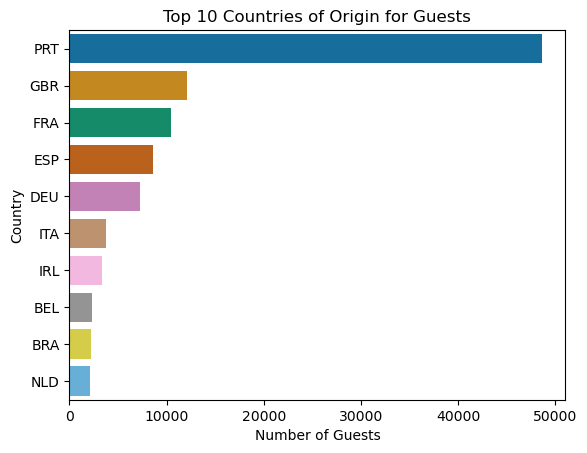

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Define specific colors for each bar
colors = sns.color_palette('colorblind', len(top_countries))

# Top Countries Visualization
sns.barplot(x=top_countries.values, y=top_countries.index, palette=colors)
plt.title('Top 10 Countries of Origin for Guests')
plt.xlabel('Number of Guests')
plt.ylabel('Country')
plt.show()

The first visualization provides a clear indication of the international diversity of the hotel's clientele. The bar chart titled "Top 10 Countries of Origin for Guests" shows that the majority of the guests originate from Portugal, followed by Great Britain, and France.This data suggests that targeted marketing strategies in these regions could be highly effective.



customer_type
Transient          89613
Transient-Party    25124
Contract            4076
Group                577
Name: count, dtype: int64


C:\Users\steri\AppData\Local\Temp\ipykernel_34596\2363445105.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.barplot(x=customer_types.index, y=customer_types.values, palette='viridis')  # Choose a palette


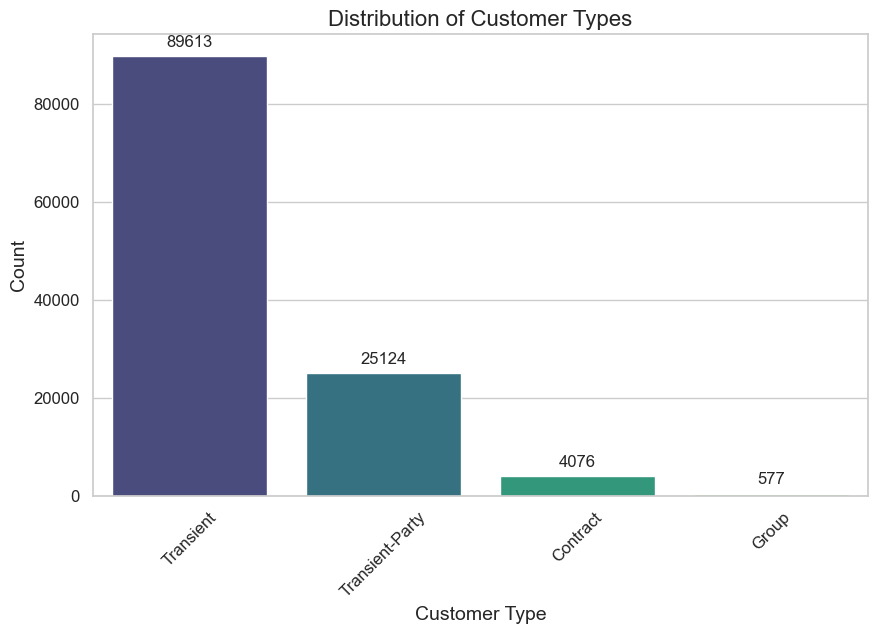

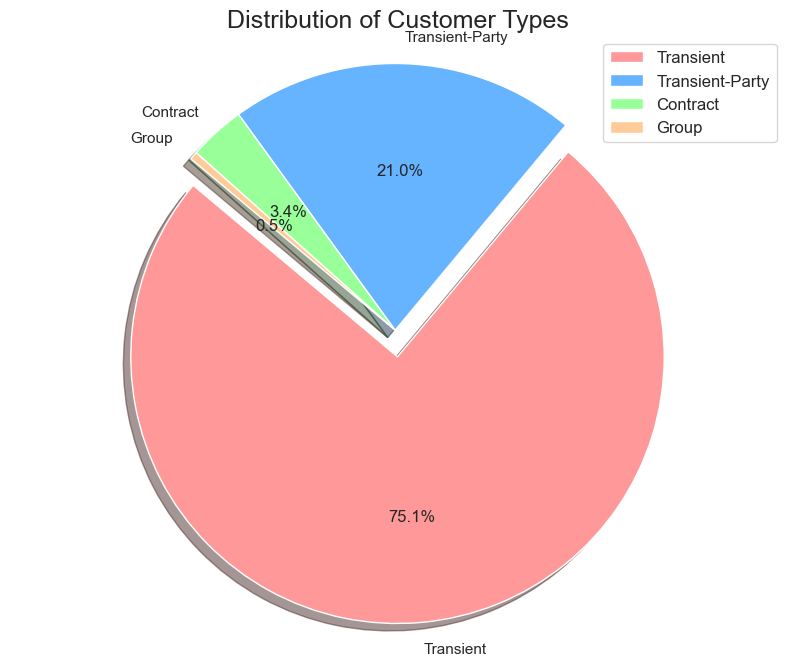

In [15]:
# Common Customer Type

customer_types = hotel_booking_df['customer_type'].value_counts()
print(customer_types)

import seaborn as sns
import matplotlib.pyplot as plt

# Using seaborn's style
sns.set(style="whitegrid")

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size
customer_types = hotel_booking_df['customer_type'].value_counts()
ax = sns.barplot(x=customer_types.index, y=customer_types.values, palette='viridis')  # Choose a palette

# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Customizing fonts and labels
plt.title('Distribution of Customer Types', fontsize=16)
plt.xlabel('Customer Type', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)

# Show the plot
plt.show()

import matplotlib.pyplot as plt

# Counting the customer types
customer_types = hotel_booking_df['customer_type'].value_counts()



# Pie Chart to see customer distribution 
explode = (0.1, 0, 0, 0)  # Explode the largest segment
colors = ['#ff9999','#66b3ff','#99ff99','#ffcc99']  # Custom color palette
plt.figure(figsize=(10, 8))
plt.pie(customer_types, labels=customer_types.index, autopct='%1.1f%%', startangle=140, 
        explode=explode, colors=colors, shadow=True)

# Enhancing readability
plt.title('Distribution of Customer Types', fontsize=18)
plt.legend(customer_types.index, loc="best", fontsize=12)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular

# Show the plot
plt.show()



Moving to customer types, as depicted in both the bar and pie charts, 'Transient' customers form the largest segment, accounting for a staggering 75.1% of all customers. 'Transient-Party' comes next with 21%, followed by 'Contract' and 'Group' customers with 3.4% and 0.5%, respectively. This indicates a predominantly individual or small-group travel pattern among our clientele, guiding us to potentially focus on personalization and individualized guest experiences.



A    85994
D    19201
E     6535
F     2897
G     2094
B     1118
C      932
H      601
P       12
L        6
Name: reserved_room_type, dtype: int64
0    70318
1    33226
2    12969
3     2497
4      340
5       40
Name: total_of_special_requests, dtype: int64


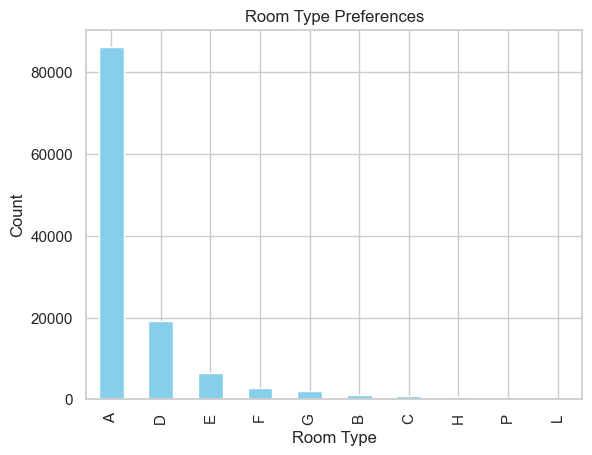

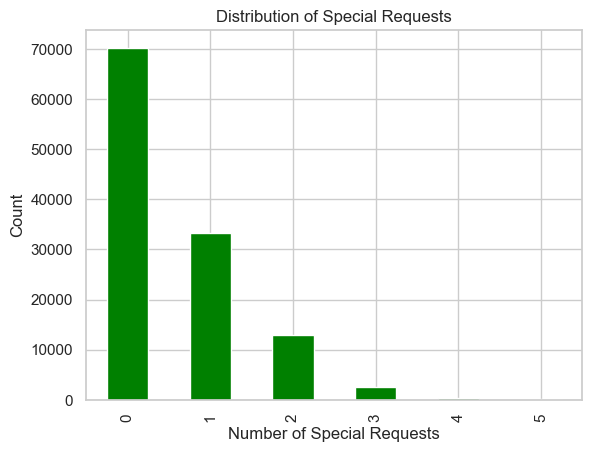

In [10]:
# 3. Room Preference and Special Requests

room_preferences = hotel_booking_df['reserved_room_type'].value_counts()
special_requests = hotel_booking_df['total_of_special_requests'].value_counts()
print(room_preferences)
print(special_requests)

# Room Preferences and Special Requests Visualization
room_preferences.plot(kind='bar', color='skyblue')
plt.title('Room Type Preferences')
plt.xlabel('Room Type')
plt.ylabel('Count')
plt.show()

special_requests.plot(kind='bar', color='green')
plt.title('Distribution of Special Requests')
plt.xlabel('Number of Special Requests')
plt.ylabel('Count')

plt.show()


a specific room type, which emerges as the most commonly booked A


-------------------------
2.Booking Patterns:
-------------------------


What are the peak and off-peak seasons? By examining booking dates, you can identify trends and seasonality in hotel bookings.
How far in advance do guests book their stays? The lead_time can provide insights into booking behavior, which can be crucial for pricing and promotion strategies.

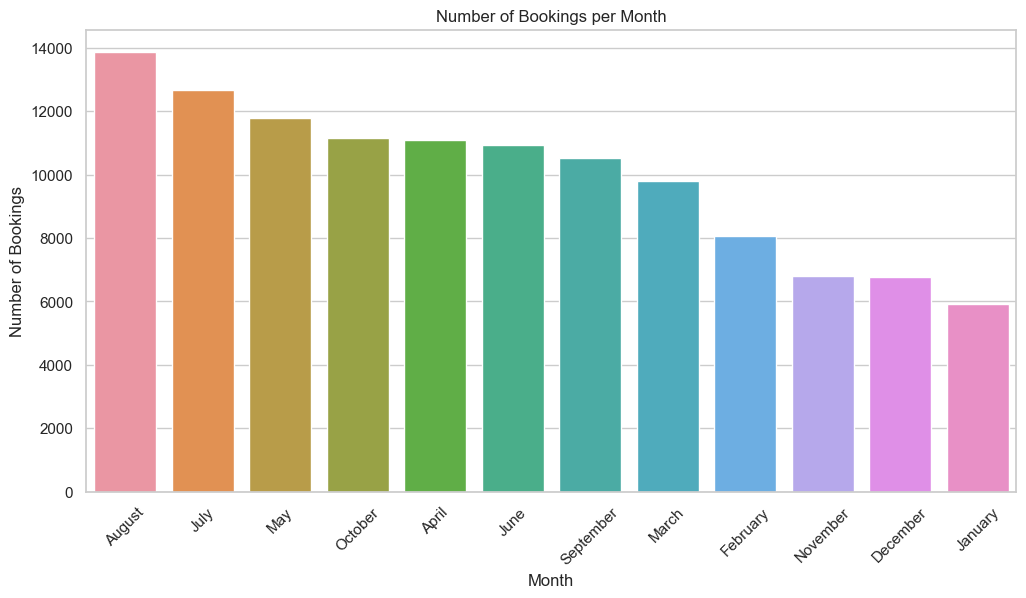

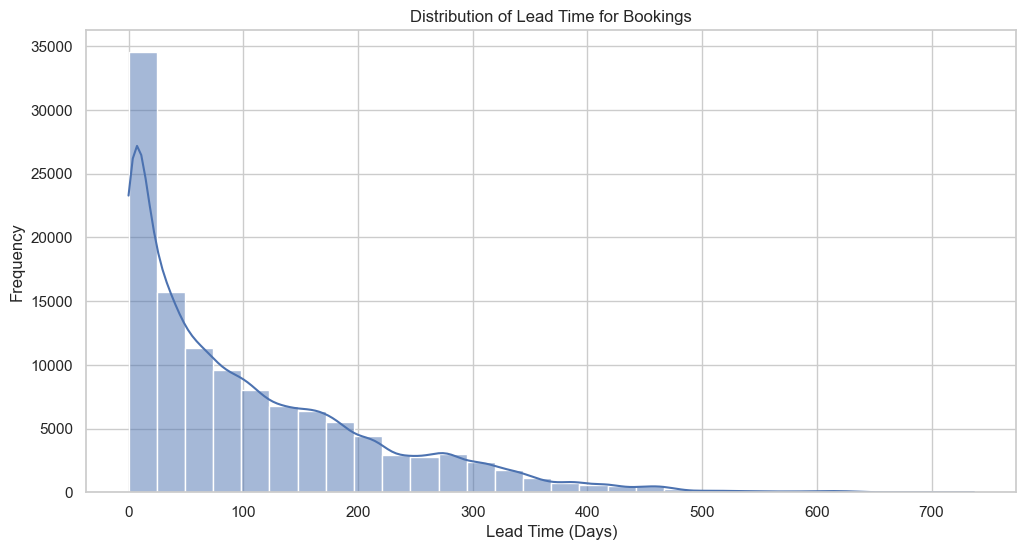

In [11]:

# Counting bookings per month
bookings_per_month = hotel_booking_df['arrival_date_month'].value_counts()

# Plotting bookings per month
plt.figure(figsize=(12, 6))
sns.barplot(x=bookings_per_month.index, y=bookings_per_month.values)
plt.xticks(rotation=45)
plt.title('Number of Bookings per Month')
plt.xlabel('Month')
plt.ylabel('Number of Bookings')
plt.show()

# Analyzing lead time
plt.figure(figsize=(12, 6))
sns.histplot(hotel_booking_df['lead_time'], bins=30, kde=True)
plt.title('Distribution of Lead Time for Bookings')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Frequency')
plt.show()


Peak booking periods are evident in the months of August, July, and May, with the highest number occurring in August. This suggests a high demand for accommodations during these summer months,
histogram indicates that a significant number of bookings are made with a relatively short lead time, peaking at 0-10 days.

C:\Users\dx_st\AppData\Local\Temp\ipykernel_23652\1686171752.py:13: FutureWarning: In a future version of pandas all arguments of DataFrame.pivot will be keyword-only.
  monthly_bookings_pivot = monthly_bookings.pivot('arrival_date_month', 'arrival_date_year', 'count')


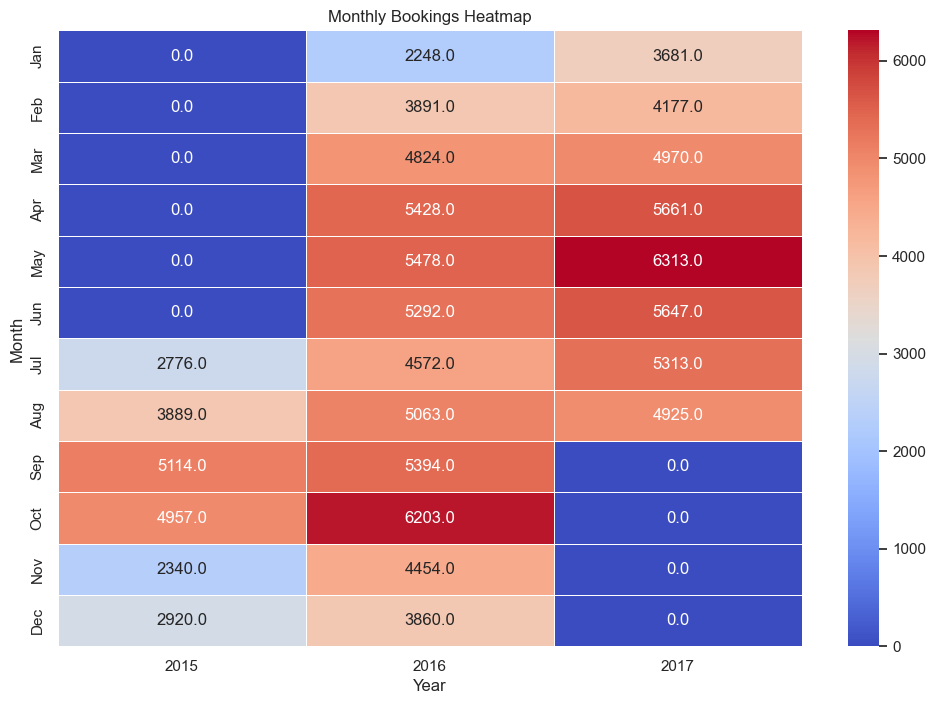

In [12]:

# Load the dataset into a DataFrame 
hotel_booking_df = pd.read_csv('hotel_booking.csv')

# Since the month is already a string, we don't need to convert dates, but we may want to map the month strings to integers if not already done
months_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                  'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
hotel_booking_df['arrival_date_month'] = hotel_booking_df['arrival_date_month'].map(months_mapping)

# Group by year and month to count bookings
monthly_bookings = hotel_booking_df.groupby(['arrival_date_year', 'arrival_date_month']).size().reset_index(name='count')

# Pivot table for heatmap
monthly_bookings_pivot = monthly_bookings.pivot('arrival_date_month', 'arrival_date_year', 'count')


# Fill NaN values in the pivot table
monthly_bookings_pivot = monthly_bookings_pivot.fillna(0)

# Create a heatmap

plt.figure(figsize=(12, 8))
sns.heatmap(monthly_bookings_pivot, annot=True, fmt=".1f", cmap="coolwarm", linewidths=.5)
plt.title('Monthly Bookings Heatmap')
plt.xlabel('Year')
plt.ylabel('Month')
plt.yticks([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5, 7.5, 8.5, 9.5, 10.5, 11.5],
           ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.show()


-------------------------
3. Cancellation Analysis:
--------------------------

What is the overall cancellation rate? This is critical for forecasting revenue and occupancy.
Are there specific factors that correlate with higher cancellation rates? For example, does a longer lead time, certain customer types, or lack of special requests correlate with more cancellations? This can inform cancellation policy adjustments.

In [13]:
# Calculate cancellation rate
total_bookings = len(hotel_booking_df)
total_cancellations = hotel_booking_df['is_canceled'].sum()
cancellation_rate = (total_cancellations / total_bookings) * 100

print(f"Cancellation Rate: {cancellation_rate:.2f}%")


Cancellation Rate: 37.04%


The overall cancellation rate in the dataset is approximately 37.04%.

In [14]:

# Basic Customer Segmentation Analysis

# Segmentation by Country
country_segmentation = hotel_booking_df.groupby('country').agg(
    Number_of_Bookings=pd.NamedAgg(column='country', aggfunc='count'),
    Average_Stay_Days=pd.NamedAgg(column='stays_in_week_nights', aggfunc='mean'),
    Cancellation_Rate=pd.NamedAgg(column='is_canceled', aggfunc='mean')
).sort_values(by='Number_of_Bookings', ascending=False)

# Segmentation by Customer Type
customer_type_segmentation = hotel_booking_df.groupby('customer_type').agg(
    Number_of_Bookings=pd.NamedAgg(column='customer_type', aggfunc='count'),
    Average_Stay_Days=pd.NamedAgg(column='stays_in_week_nights', aggfunc='mean'),
    Cancellation_Rate=pd.NamedAgg(column='is_canceled', aggfunc='mean')
)

# Output the top 5 countries
print("Segmentation by Country (Top 5):")
print(country_segmentation.head())

# Output the segmentation by customer type
print("\nSegmentation by Customer Type:")
print(customer_type_segmentation)

# Lead Time Analysis
lead_time_cancellation_rate = hotel_booking_df.groupby('lead_time')['is_canceled'].mean()

# Cancellation Rate by Number of Special Requests
cancellation_by_special_requests = hotel_booking_df.groupby('total_of_special_requests')['is_canceled'].mean()




print("\nCancellation Rate by Number of Special Requests:")
print(cancellation_by_special_requests)

Segmentation by Country (Top 5):
         Number_of_Bookings  Average_Stay_Days  Cancellation_Rate
country                                                          
PRT                   48590           2.176291           0.566351
GBR                   12129           3.445874           0.202243
FRA                   10415           2.536438           0.185694
ESP                    8568           2.246965           0.254085
DEU                    7287           2.559764           0.167147

Segmentation by Customer Type:
                 Number_of_Bookings  Average_Stay_Days  Cancellation_Rate
customer_type                                                            
Contract                       4076           3.851079           0.309617
Group                           577           2.057192           0.102253
Transient                     89613           2.508330           0.407463
Transient-Party               25124           2.262697           0.254299

Cancellation Rate by Number 

a. Transient customers means the customer who are temorarily travelling have the highest cancellation rate almost ~ 41 %

b. The more special requests a booking has, the lower the cancellation rate. Bookings with no special requests have a cancellation rate of about 47.72%, while those with 5 special requests have a rate of just 5.00%.

c. Also the number of bookings and cancellation rates are highly correlated. The higher number bookings tends to have higher number of cancelation rate and viseversa.

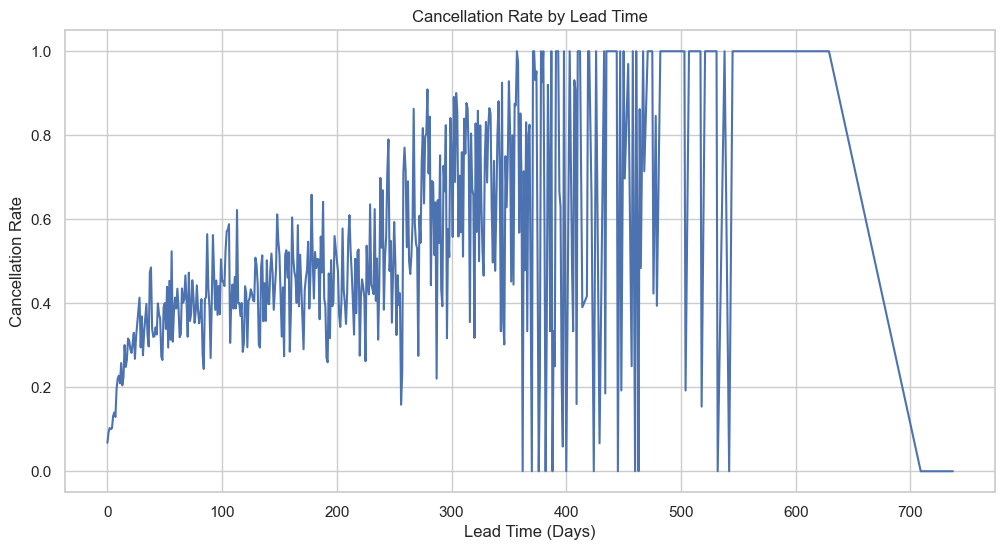

In [15]:
# Plotting the Lead Time Analysis
plt.figure(figsize=(12, 6))
sns.lineplot(x=lead_time_cancellation_rate.index, y=lead_time_cancellation_rate.values)
plt.title('Cancellation Rate by Lead Time')
plt.xlabel('Lead Time (Days)')
plt.ylabel('Cancellation Rate')
plt.grid(True)
plt.show()

The plot shows the relationship between lead time and cancellation rate. A general trend can be observed where longer lead times are associated with higher cancellation rates.
These insights can be very useful for understanding the behavior of different customer segments and how various factors influence cancellation rates. we can use this information for targeted strategies to reduce cancellations or for improving booking policies.

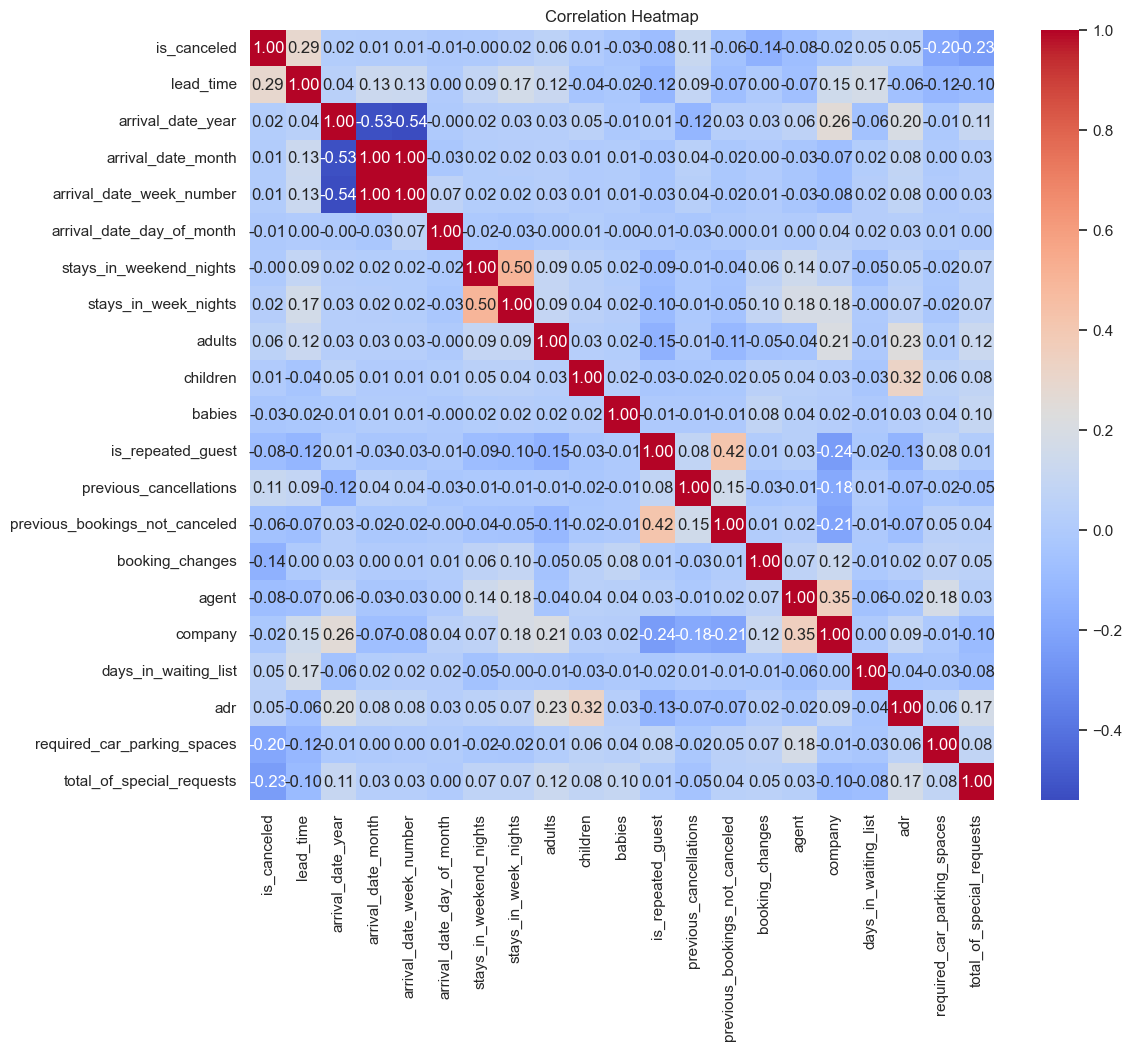

In [16]:
# Correlation Heatmap

plt.figure(figsize=(12, 10))
sns.heatmap(hotel_booking_df.select_dtypes(include=['int64', 'float64']).corr(), annot=True, fmt=".2f", cmap='coolwarm')
plt.title('Correlation Heatmap')
plt.show()


The heatmap is a visualization tool used to understand the relationships between multiple variables at once, in this case, within a hotel booking dataset. Here's an overall interpretation of the heatmap:

Strong Positive Correlations: Certain variables, like lead_time and previous_cancellations, show a strong positive correlation with the is_canceled variable. This indicates that bookings made far in advance or by customers who have previously canceled are more likely to be canceled again. 


Lead time and arrival date_year have a strong positive correlation with is_canceled. This means that bookings made closer to the arrival date and during certain times of the year (e.g., holidays) are more likely to be canceled.
Stays_in_weekend_nights has a weak negative correlation with is_canceled. This means that bookings that include weekend nights are slightly less likely to be canceled.
Adults have a weak positive correlation with is_canceled. This means that bookings with more adults are slightly more likely to be canceled.
Is_repeated_guest has a weak negative correlation with is_canceled. This means that repeat guests are slightly less likely to cancel their bookings.
Previous_cancellations has a weak positive correlation with is_canceled. This means that guests who have canceled bookings in the past are slightly more likely to cancel their bookings in the future.
Adr (average daily rate) has a weak positive correlation with is_canceled. This means that more expensive bookings are slightly more likely to be canceled.


---------------------------
4. Revenue Management:
---------------------------

What are the average daily rates (ADR) across different times of the year or customer segments? This could inform dynamic pricing strategies.
Which segments yield the highest revenue? Understanding which customer segments or room types bring in more revenue can help in resource allocation and marketing.

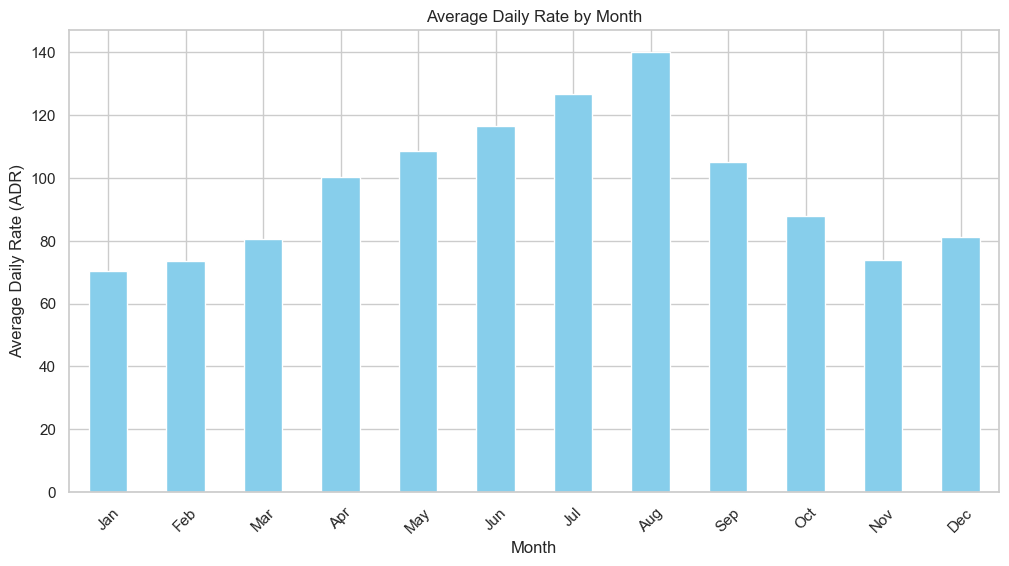

In [17]:

# Load the dataset into a DataFrame 
hotel_booking_df = pd.read_csv('hotel_booking.csv')

# Map the month names to numbers if 'arrival_date_month' is not already in numeric form
months_mapping = {'January': 1, 'February': 2, 'March': 3, 'April': 4, 'May': 5, 'June': 6,
                  'July': 7, 'August': 8, 'September': 9, 'October': 10, 'November': 11, 'December': 12}
hotel_booking_df['arrival_date_month'] = hotel_booking_df['arrival_date_month'].map(months_mapping)

# Calculate the average ADR for each month
adr_by_month = hotel_booking_df.groupby('arrival_date_month')['adr'].mean().sort_index()

# Plot the ADR by month
plt.figure(figsize=(12, 6))
adr_by_month.plot(kind='bar', color='skyblue')
plt.title('Average Daily Rate by Month')
plt.xlabel('Month')
plt.ylabel('Average Daily Rate (ADR)')
plt.xticks(ticks=range(len(adr_by_month)), labels=['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'], rotation=45)
plt.show()


hotel bookings reveals a seasonal pricing pattern, with peaks typically during the summer months of June, July, and August, suggesting higher demand possibly due to vacationers and favorable weather. 

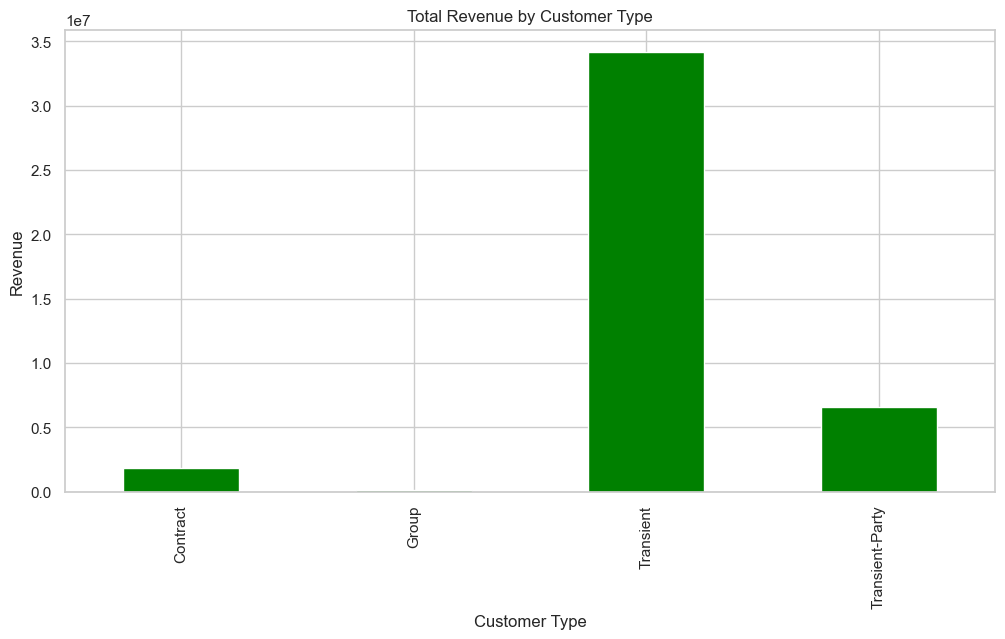

In [18]:
# revenue by customer segment
# Calculate the total nights stayed
hotel_booking_df['total_nights'] = hotel_booking_df['stays_in_weekend_nights'] + hotel_booking_df['stays_in_week_nights']

# Calculate the revenue by booking
hotel_booking_df['revenue'] = hotel_booking_df['adr'] * hotel_booking_df['total_nights']

# Aggregate the total revenue by customer type
revenue_by_customer_type = hotel_booking_df.groupby('customer_type')['revenue'].sum()

# Plot the revenue by customer type
plt.figure(figsize=(12, 6))
revenue_by_customer_type.plot(kind='bar', color='green')
plt.title('Total Revenue by Customer Type')
plt.xlabel('Customer Type')
plt.ylabel('Revenue')
plt.show()


----------------------------
5. Logistic Regression Model
-----------------------------

LogisticRegression To perform predictive analytics using machine learning algorithms to predict booking cancellations this can help us in future

In [19]:
# LogisticRegression To perform predictive analytics using machine learning algorithms to predict booking cancellations

import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score


hotel_booking_df = pd.read_csv('hotel_booking.csv')

# Selecting relevant features (example features, adjust as needed)
features = ['lead_time', 'total_of_special_requests', 'country', 'deposit_type', 'customer_type',
            'previous_cancellations', 'required_car_parking_spaces', 'adr', 'adults']
target = 'is_canceled'

# Preprocessing
X = hotel_booking_df[features]
y = hotel_booking_df[target]



# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

# Define preprocessing for numerical and categorical features
numerical_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

preprocessor = make_column_transformer(
    (make_pipeline(SimpleImputer(strategy='median'), StandardScaler()), numerical_features),
    (make_pipeline(SimpleImputer(strategy='constant', fill_value='missing'), 
                   OneHotEncoder(handle_unknown='ignore')), categorical_features)
)

# Create a pipeline
model = make_pipeline(
    preprocessor,
    LogisticRegression(solver='liblinear', random_state=42)
)

# Train the model
model.fit(X_train, y_train)

# Predictions and evaluation
y_pred = model.predict(X_test)
print(classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]))


              precision    recall  f1-score   support

           0       0.78      0.92      0.85     18720
           1       0.81      0.57      0.67     11128

    accuracy                           0.79     29848
   macro avg       0.80      0.75      0.76     29848
weighted avg       0.79      0.79      0.78     29848

Confusion Matrix:
 [[17235  1485]
 [ 4752  6376]]
ROC AUC Score: 0.8525072802801279


the logistic regression model is quite good at predicting whether a booking will be canceled or not, with particularly strong performance in identifying the non-canceled bookings. However, it is less effective in correctly identifying the canceled bookings, as evidenced by the lower recall for class 1. The ROC AUC score suggests that the model has a good measure of separability and is capable of distinguishing between canceled and non-canceled bookings effectively.


## market segment vs customer type


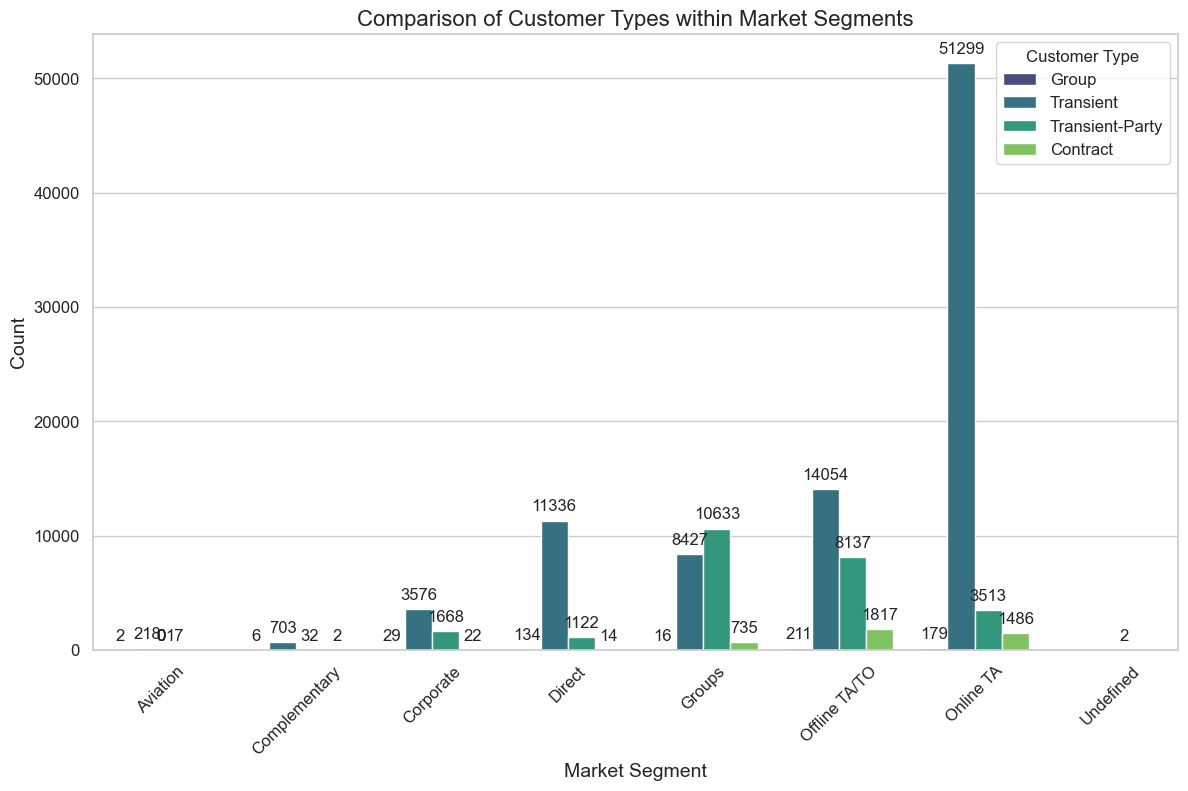

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

# Grouping the data by market_segment and customer_type
market_customer_counts = hotel_booking_df.groupby(['market_segment', 'customer_type']).size().reset_index(name='counts')

# Plotting
plt.figure(figsize=(14, 8))  # Set the figure size
sns.set(style="whitegrid")

# Create a grouped bar plot
ax = sns.barplot(x='market_segment', y='counts', hue='customer_type', data=market_customer_counts, palette='viridis')

# Adding annotations
for p in ax.patches:
    ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Customizing fonts and labels
plt.title('Comparison of Customer Types within Market Segments', fontsize=16)
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.legend(title='Customer Type', fontsize=12)

# Show the plot
plt.show()

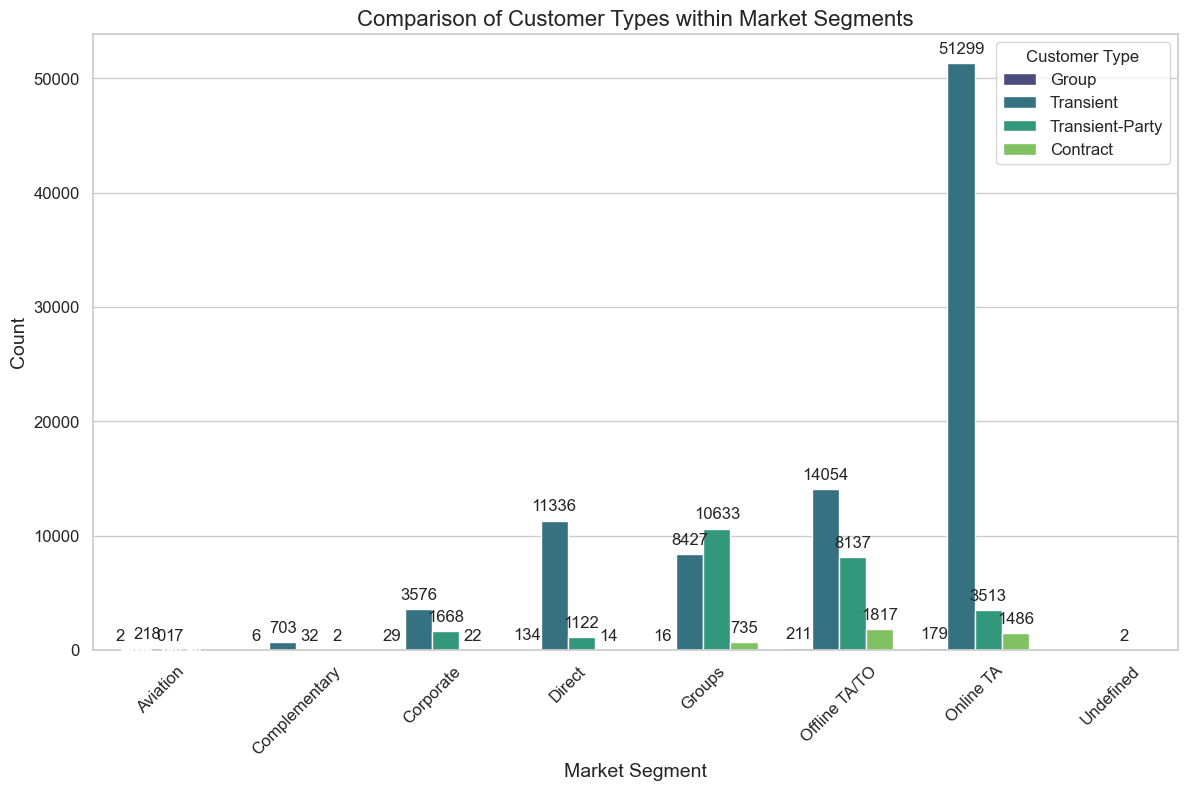

In [20]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Assuming hotel_booking_df is already defined and loaded

# Grouping the data by market_segment and customer_type for counts
market_customer_counts = hotel_booking_df.groupby(['market_segment', 'customer_type']).size().reset_index(name='counts')

# Grouping the data by market_segment and customer_type for average ADR
market_customer_adr = hotel_booking_df.groupby(['market_segment', 'customer_type'])['adr'].mean().reset_index(name='average_adr')

# Merging the two dataframes
market_customer_data = pd.merge(market_customer_counts, market_customer_adr, on=['market_segment', 'customer_type'])

# Plotting
plt.figure(figsize=(14, 8))  # Set the figure size
sns.set(style="whitegrid")

# Create a grouped bar plot for counts
ax = sns.barplot(x='market_segment', y='counts', hue='customer_type', data=market_customer_data, palette='viridis')

# Adding annotations for counts and average ADR
for p in ax.patches:
    
    # Annotate average ADR
    segment = p.get_x() + p.get_width() / 2.
    customer_type = p.get_label()
    market_segment = ax.get_xticklabels()[int(p.get_x() + p.get_width() / 2.)].get_text()
    adr = market_customer_data[(market_customer_data['market_segment'] == market_segment) & 
                               (market_customer_data['customer_type'] == customer_type)]['average_adr'].values
    # Annotate counts
    if len(adr) > 0:
        adr_value = adr[0]
        ax.annotate(f'ADR: {adr_value:.2f}', 
                    (p.get_x() + p.get_width() / 2., p.get_height() / 2), 
                    ha = 'center', va = 'center', 
                    xytext = (0, 0), 
                    textcoords = 'offset points', 
                    color='white', fontsize=10, weight='bold')
    else:
        ax.annotate(format(p.get_height(), '.0f'), 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha = 'center', va = 'center', 
                xytext = (0, 10), 
                textcoords = 'offset points')

# Customizing fonts and labels
plt.title('Comparison of Customer Types within Market Segments', fontsize=16)
plt.xlabel('Market Segment', fontsize=14)
plt.ylabel('Count', fontsize=14)
plt.xticks(rotation=45, fontsize=12)  # Rotate x-axis labels for better readability
plt.yticks(fontsize=12)
plt.legend(title='Customer Type', fontsize=12)

# Show the plot
plt.show()
